In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [3]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [4]:
# Read in class scores
df = pd.read_csv('C:\\Users\\User\\Documents\\sDataJoin2.csv')
df.head()

,DistrictName,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,Reported1y0n,complete1y0n
0,ALPAUGH UNIFIED,2,5,2,2,95,2,55,57,43,43,3,1,Yes,No
1,ARCATA ELEMENTARY,46,44,46,46,50,42,39,39,18,122,5,1,Yes,No
2,ATWATER ELEMENTARY,4,3,2,2,96,1,41,71,22,613,8,1,Yes,No
3,BEAR VALLEY UNIFIED,16,16,14,14,80,8,20,62,13,113,4,1,Yes,No
4,CULVER CITY UNIFIED,4,4,4,4,94,2,12,28,5,568,6,2,Yes,No


In [5]:

df.describe()

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,10.042857,9.618571,10.018571,7.602857,88.017143,5.540000,22.447143,48.394286,11.500000,630.330000,7.271429,1.138571
std,11.046961,10.995718,11.256583,9.993531,12.530466,8.884401,12.124948,25.008530,8.206125,2226.109602,24.077320,0.345746
min,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,2.000000,0.000000,0.000000,10.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,84.000000,1.000000,13.000000,29.000000,5.000000,54.750000,1.000000,1.000000
50%,7.000000,6.000000,6.000000,4.000000,92.000000,2.000000,21.000000,49.000000,9.000000,214.500000,3.000000,1.000000
75%,13.000000,13.000000,13.000000,10.000000,96.000000,7.000000,30.000000,70.000000,16.000000,687.500000,8.000000,1.000000
max,77.000000,77.000000,77.000000,77.000000,100.000000,77.000000,72.000000,100.000000,47.000000,54238.000000,582.000000,2.000000


In [6]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: DistrictName
CARLSBAD UNIFIED                          1
THREE RIVERS UNION ELEMENTARY             1
PARADISE UNIFIED                          1
OAK VIEW UNION ELEMENTARY                 1
CLOVIS UNIFIED                            1
ETIWANDA ELEMENTARY                       1
SNELLING-MERCED FALLS UNION ELEMENTARY    1
BEARDSLEY ELEMENTARY                      1
SOULSBYVILLE ELEMENTARY                   1
MARIPOSA COUNTY UNIFIED                   1
ISLAND UNION ELEMENTARY                   1
CAMBRIAN                                  1
ORO GRANDE ELEMENTARY                     1
MAGNOLIA ELEMENTARY                       1
MEADOWS UNION ELEMENTARY                  1
SONORA ELEMENTARY                         1
SHAFFER UNION ELEMENTARY                  1
DEL MAR UNION ELEMENTARY                  1
SAUSALITO MARIN CITY                      1
SOLANA BEACH ELEMENTARY                   1
OJAI UNIFIED                              1
LA HABRA CITY ELEMENTARY                  1
EAST 

In [7]:
df.head(2)

,DistrictName,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,Reported1y0n,complete1y0n
0,ALPAUGH UNIFIED,2,5,2,2,95,2,55,57,43,43,3,1,Yes,No
1,ARCATA ELEMENTARY,46,44,46,46,50,42,39,39,18,122,5,1,Yes,No


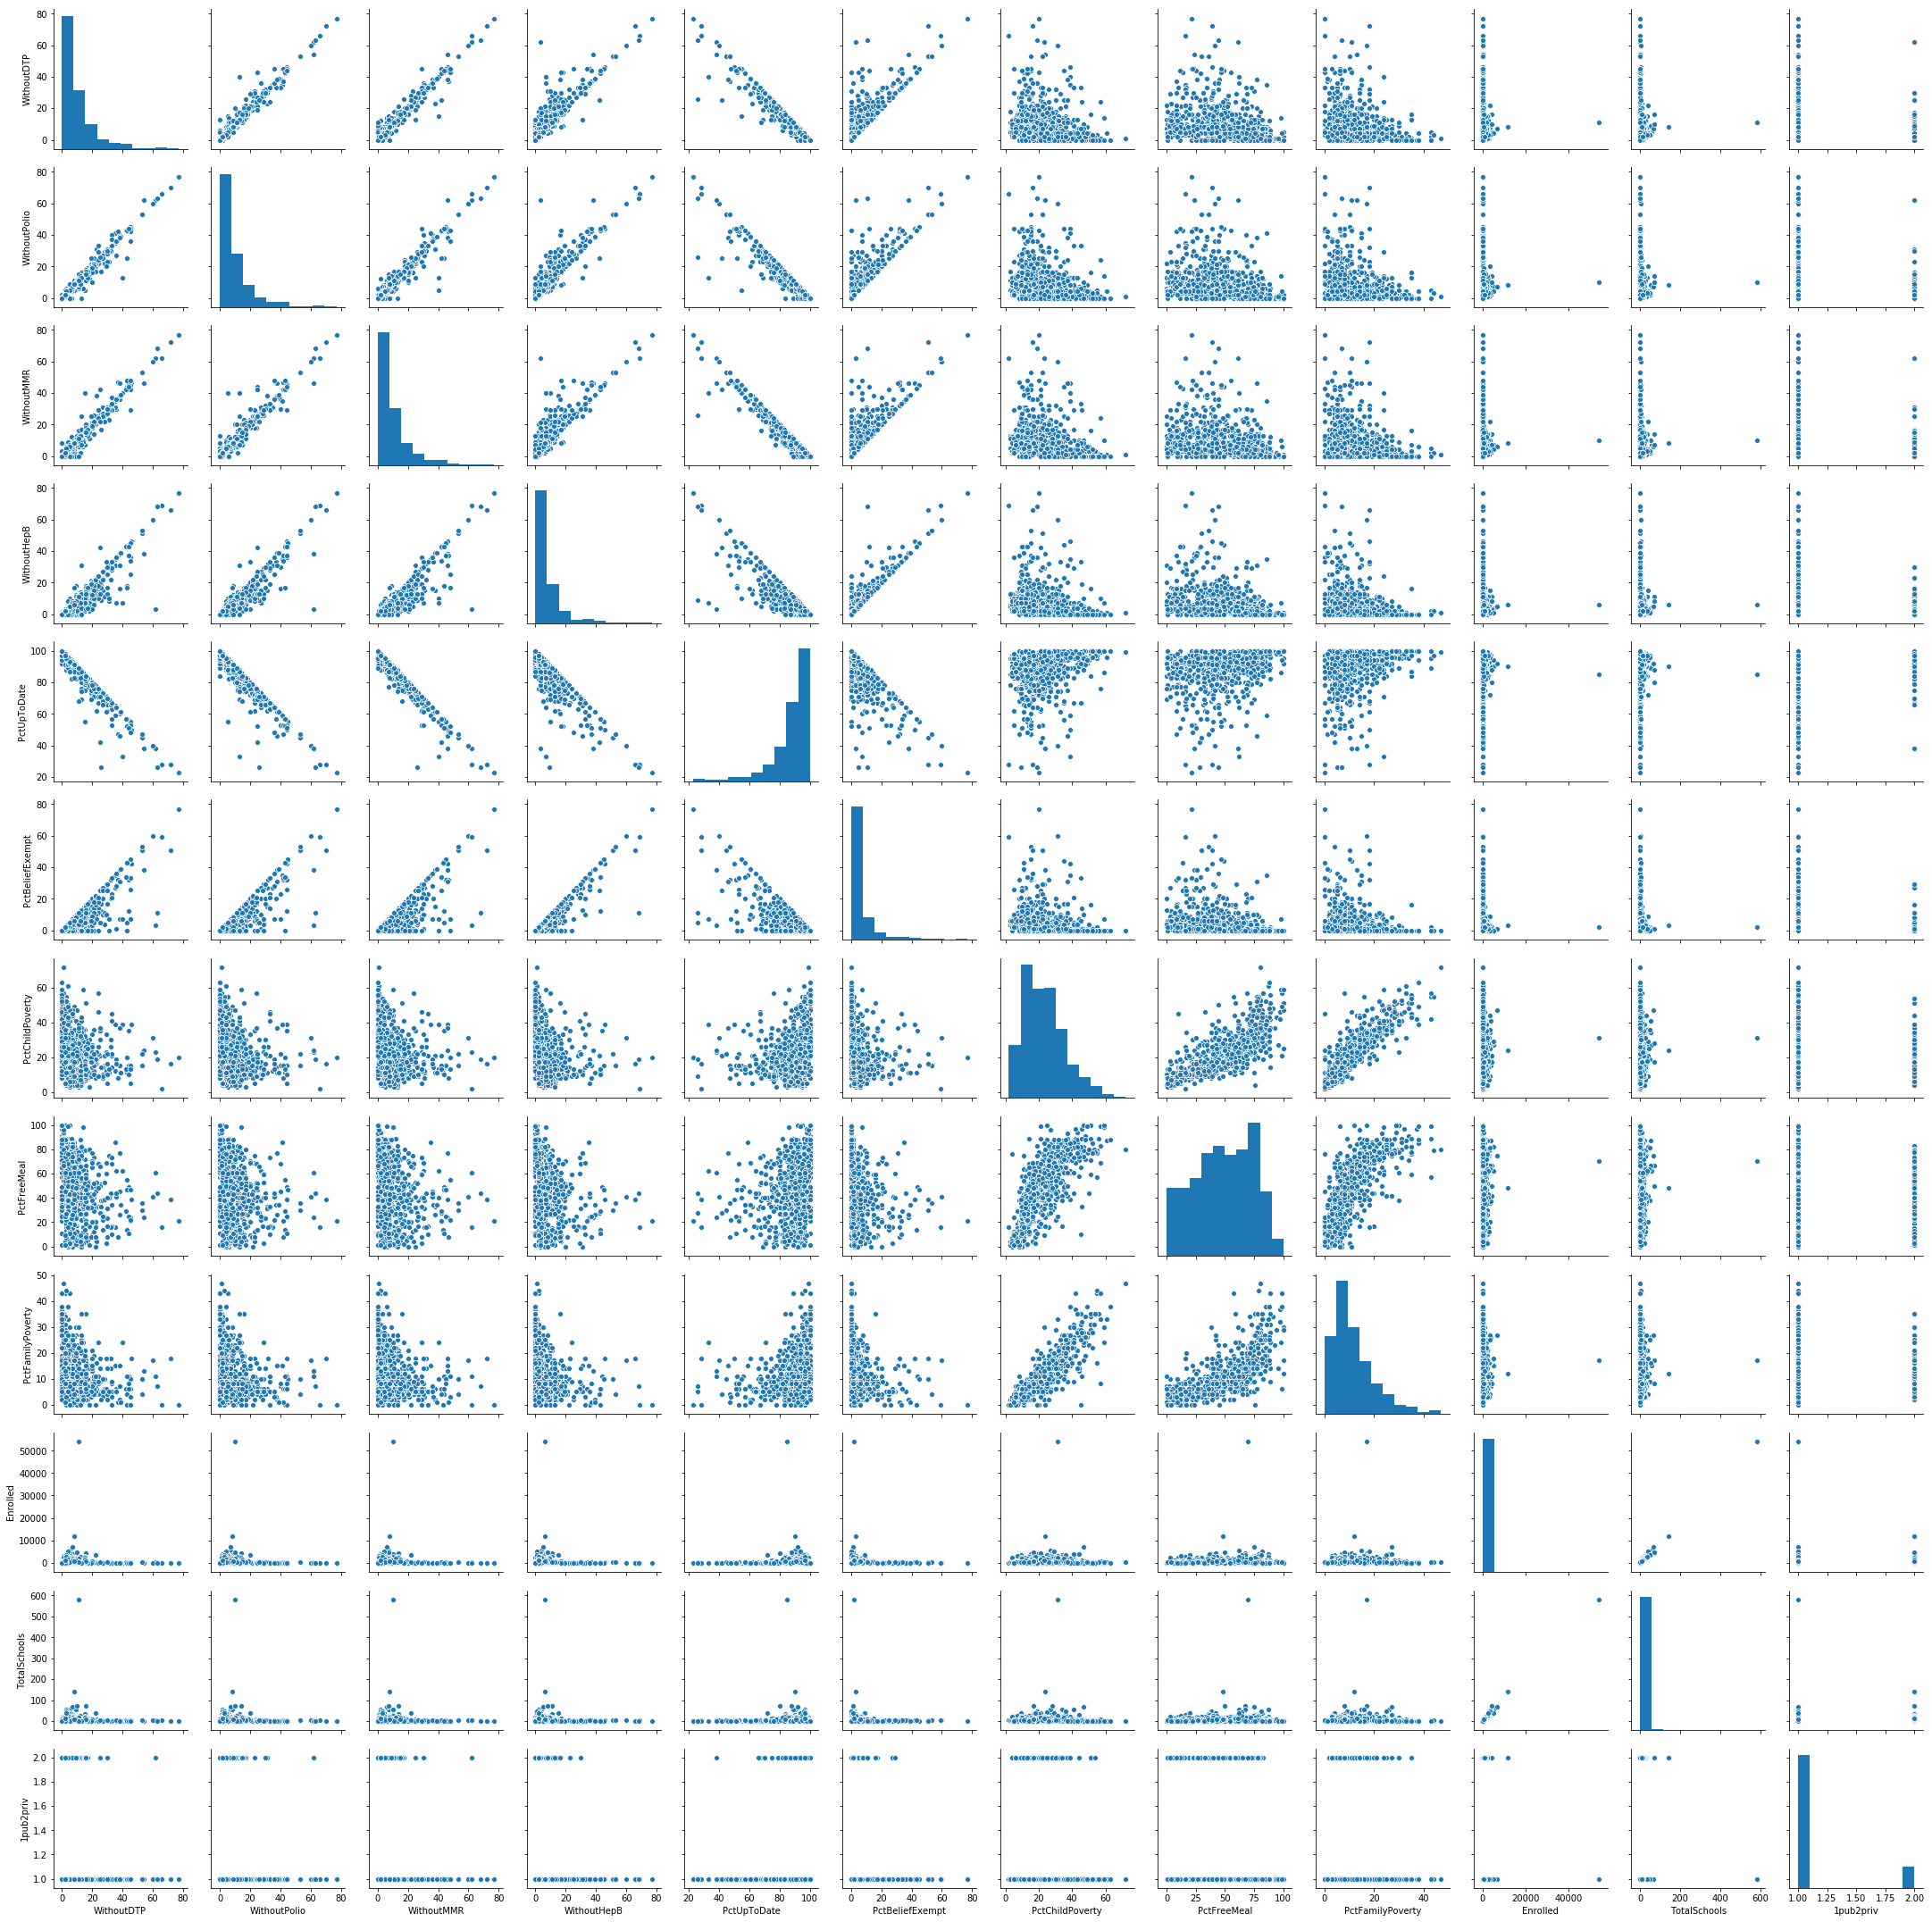

In [8]:
sns.pairplot(df);

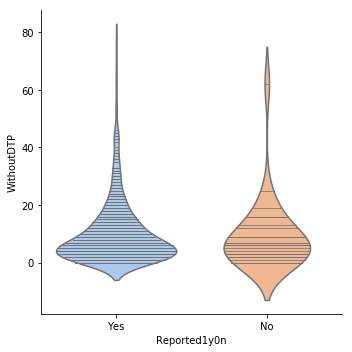

In [9]:
sns.catplot(x="Reported1y0n", y="WithoutDTP", 
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df);

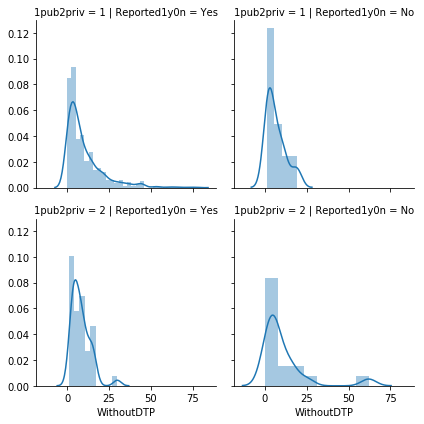

In [10]:
#sns.kdeplot([df.Reported1y0n=='Yes', 'WithoutDTP'],  label='men', shade=True)

g = sns.FacetGrid(df, row='1pub2priv', col='Reported1y0n')
g.map(sns.distplot, "WithoutDTP")
plt.show()

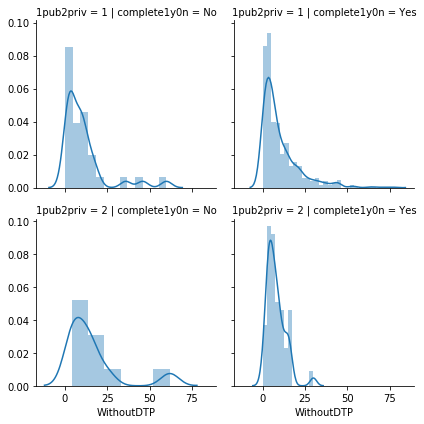

In [11]:

g = sns.FacetGrid(df, row='1pub2priv', col='complete1y0n')
g.map(sns.distplot, "WithoutDTP")
plt.show()

In [12]:
df2 = pd.read_csv('C:\\Users\\User\\Desktop\\sDataJoin.csv')

df2.drop(['DistrictName'], axis=1, inplace=True)

df2.head()

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,1y0n,1complete0no
0,2,5,2,2,95,2,55,57,43,43,3,1,1,0
1,46,44,46,46,50,42,39,39,18,122,5,1,1,0
2,4,3,2,2,96,1,41,71,22,613,8,1,1,0
3,16,16,14,14,80,8,20,62,13,113,4,1,1,0
4,4,4,4,4,94,2,12,28,5,568,6,2,1,0


In [13]:

from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data


In [14]:
# create a Python list of feature names
feature_cols = ['1complete0no', '1y0n', '1pub2priv']

# use the list to select a subset of the original DataFrame
X = df2[feature_cols]

In [15]:
y = df2['PctBeliefExempt']


In [16]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.497958631138459
[-0.01863744  0.82602082 -1.5245474 ]


In [18]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [19]:
df3 = pd.read_csv('C://Users//User//Desktop/vTimeSeries.csv')
df3.head()

,year,DTP1,HepB_BD,Pol3,Hib3,MCV1
0,1980,83,16,95,85,86
1,1981,84,16,96,85,97
2,1982,83,17,97,84,97
3,1983,84,17,97,83,98
4,1984,84,16,97,85,98


In [20]:
df3.set_index('year',inplace=True)
df3.head()

,DTP1,HepB_BD,Pol3,Hib3,MCV1
year,,,,,
1980,83,16,95,85,86
1981,84,16,96,85,97
1982,83,17,97,84,97
1983,84,17,97,83,98
1984,84,16,97,85,98


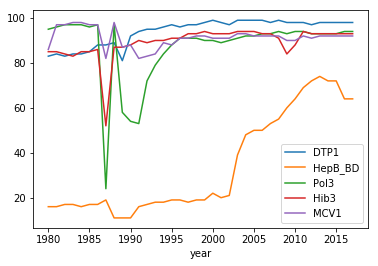

In [21]:
df3.plot();

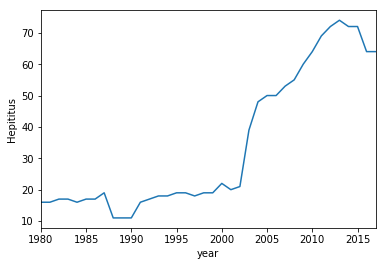

In [22]:
ax = df3['HepB_BD'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='Hepititus');

In [23]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df3['HepB_BD'], lamb=1600)

In [24]:
gdp_cycle

year
1980     3.868503
1981     3.606517
1982     4.342114
1983     4.070620
1984     2.784652
1985     3.474278
1986     3.127828
1987     4.731462
1988    -3.730619
1989    -4.277167
1990    -4.924604
1991    -0.686680
1992    -0.574065
1993    -0.597002
1994    -1.765373
1995    -2.088688
1996    -3.575354
1997    -6.232471
1998    -7.064907
1999    -9.073633
2000    -8.255204
2001   -12.600504
2002   -14.095260
2003     1.282680
2004     7.564274
2005     6.779682
2006     3.954333
2007     4.109420
2008     3.263665
2009     5.433222
2010     6.632203
2011     8.871326
2012     9.157165
2013     8.490746
2014     3.867376
2015     1.277050
2016    -9.292648
2017   -11.854938
Name: HepB_BD, dtype: float64

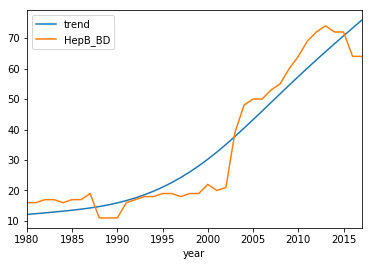

In [25]:
df3['trend'] = gdp_trend
df3[['trend','HepB_BD']].plot().autoscale(axis='x',tight=True);

In [26]:
df3.index.freq = 'Y'
df3.head()

,DTP1,HepB_BD,Pol3,Hib3,MCV1,trend
year,,,,,,
1980,83,16,95,85,86,12.131497
1981,84,16,96,85,97,12.393483
1982,83,17,97,84,97,12.657886
1983,84,17,97,83,98,12.929380
1984,84,16,97,85,98,13.215348


In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(df3['HepB_BD'].autocorr(l))

FileNotFoundError: [Errno 2] No such file or directory: 'plots/Section 1/_01_15.png'

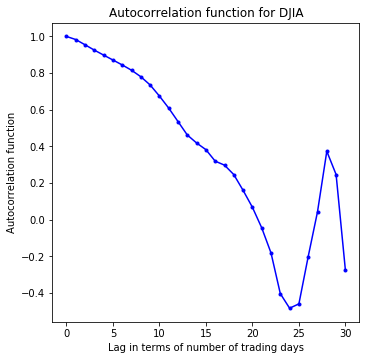

In [29]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')
plt.savefig('plots/Section 1/_01_15.png', format='png', dpi=300)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

FileNotFoundError: [Errno 2] No such file or directory: 'plots/Section 1/_01_16.png'

<Figure size 396x396 with 0 Axes>

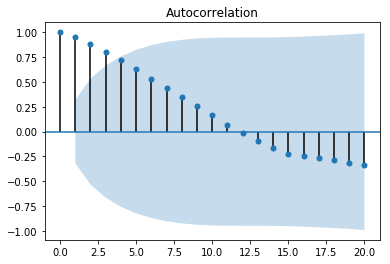

In [31]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(df3['HepB_BD'], lags=20)
plt.savefig('plots/Section 1/_01_16.png', format='png', dpi=300)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


FileNotFoundError: [Errno 2] No such file or directory: 'plots/Section 1/_01_17.png'

<Figure size 396x396 with 0 Axes>

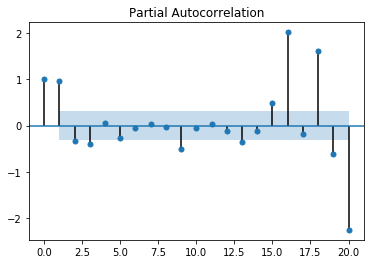

In [32]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(df3['HepB_BD'], lags=20)
plt.savefig('plots/Section 1/_01_17.png', format='png', dpi=300)

In [33]:
df2.head()

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,1y0n,1complete0no
0,2,5,2,2,95,2,55,57,43,43,3,1,1,0
1,46,44,46,46,50,42,39,39,18,122,5,1,1,0
2,4,3,2,2,96,1,41,71,22,613,8,1,1,0
3,16,16,14,14,80,8,20,62,13,113,4,1,1,0
4,4,4,4,4,94,2,12,28,5,568,6,2,1,0


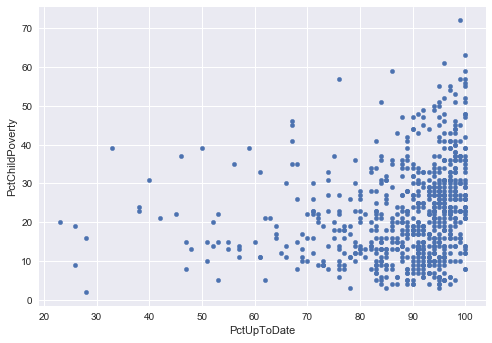

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

df2.plot(x='PctUpToDate', y='PctChildPoverty', kind='scatter')
plt.show()

In [35]:
import statsmodels.api as sm 
X = df2['PctChildPoverty']
y = df2['PctUpToDate']

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PctUpToDate   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2526.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          2.65e-234
Time:                        22:55:35   Log-Likelihood:                -3599.3
No. Observations:                 700   AIC:                             7201.
Df Residuals:                     699   BIC:                             7205.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
PctChildPoverty     3.0846      0.061     50.264      0.000       2.964       3.205
==============================================================================
Omnibus:                       49.301   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.919
Skew:                          -0.690   Prob(JB):                     2.65e-13
Kurtosis:                       3.289   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

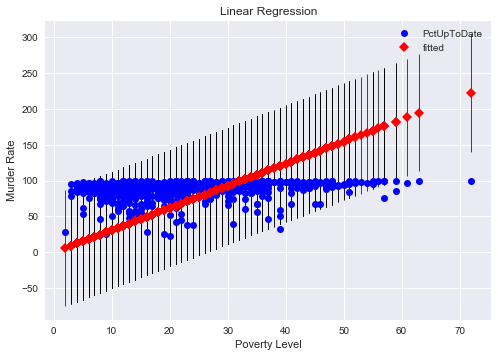

In [40]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(model, 0, ax=ax)
ax.set_ylabel("Murder Rate")
ax.set_xlabel("Poverty Level")
ax.set_title("Linear Regression")
plt.show()

In [41]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [45]:
model13 = ols('PctUpToDate ~ PctChildPoverty', data=df2).fit()
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:            PctUpToDate   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     31.10
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.50e-08
Time:                        23:05:03   Log-Likelihood:                -2747.2
No. Observations:                 700   AIC:                             5498.
Df Residuals:                     698   BIC:                             5508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.2258      0.976     

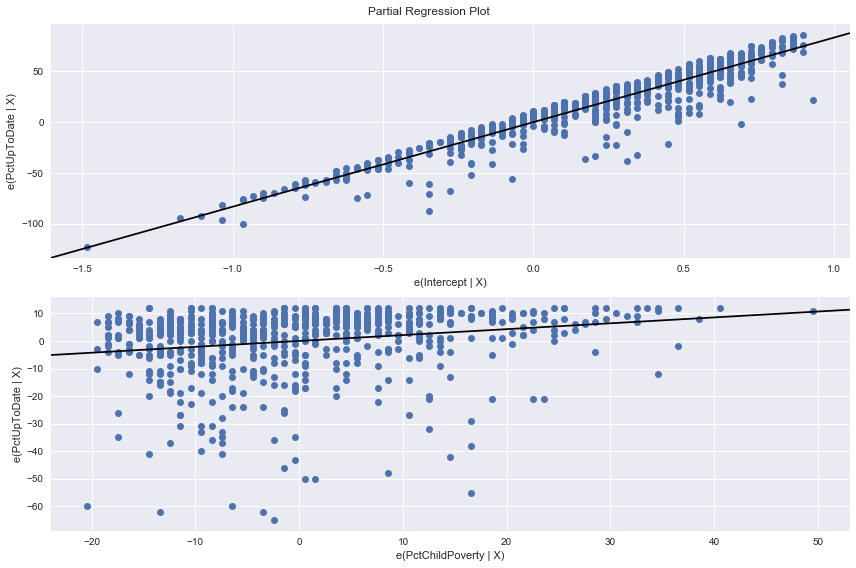

In [46]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model13, fig=fig)

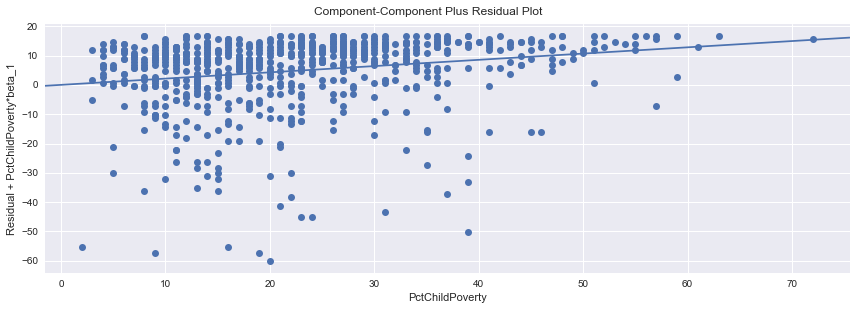

In [49]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(model13, fig=fig)

In [50]:
df2.head()

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,1y0n,1complete0no
0,2,5,2,2,95,2,55,57,43,43,3,1,1,0
1,46,44,46,46,50,42,39,39,18,122,5,1,1,0
2,4,3,2,2,96,1,41,71,22,613,8,1,1,0
3,16,16,14,14,80,8,20,62,13,113,4,1,1,0
4,4,4,4,4,94,2,12,28,5,568,6,2,1,0


In [56]:
model14 = ols("prestige ~ income + education", data=prestige).fit()
from IPython.display import HTML, display
# fit our model with .fit() and show results
# we use statsmodels' formula API to invoke the syntax below,
# where we write out the formula using ~
model14 = ols('PctUpToDate ~ PctChildPoverty', data=df2).fit()

# summarize our model
model_summary = model13.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [57]:
df2.head()

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,1y0n,1complete0no
0,2,5,2,2,95,2,55,57,43,43,3,1,1,0
1,46,44,46,46,50,42,39,39,18,122,5,1,1,0
2,4,3,2,2,96,1,41,71,22,613,8,1,1,0
3,16,16,14,14,80,8,20,62,13,113,4,1,1,0
4,4,4,4,4,94,2,12,28,5,568,6,2,1,0


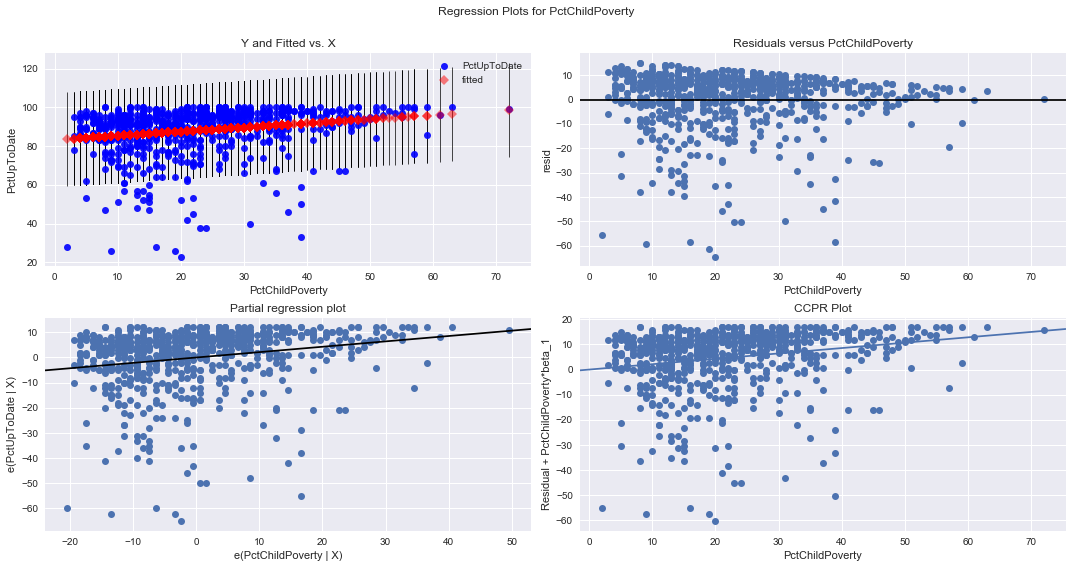

In [58]:
## This produces our four regression plots for total_umployed
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model13, "PctChildPoverty", fig=fig)

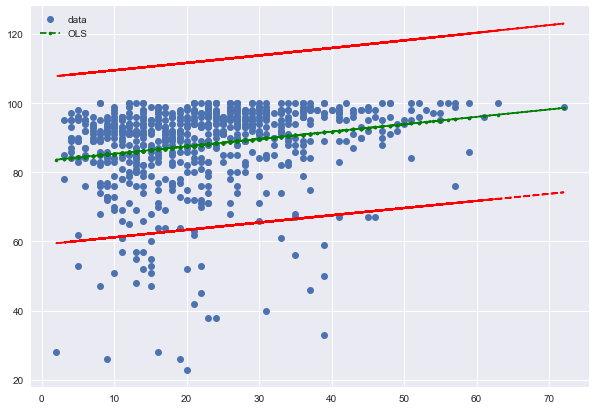

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# predictor variable (x) and dependent variable (y)
x = df2['PctChildPoverty']
y = df2['PctUpToDate']

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(model13)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, model13.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

In [62]:
df2.head(2)

,WithoutDTP,WithoutPolio,WithoutMMR,WithoutHepB,PctUpToDate,PctBeliefExempt,PctChildPoverty,PctFreeMeal,PctFamilyPoverty,Enrolled,TotalSchools,1pub2priv,1y0n,1complete0no
0,2,5,2,2,95,2,55,57,43,43,3,1,1,0
1,46,44,46,46,50,42,39,39,18,122,5,1,1,0


In [65]:
# again, invoke statsmodel's formula API using the below syntax
model15 = ols("""PctUpToDate ~ PctChildPoverty 
                                        + WithoutDTP
                                        + WithoutPolio
                                        + WithoutMMR
                                        + WithoutHepB
                                        + PctBeliefExempt
                                        + PctFreeMeal
                                        + PctFamilyPoverty
                                        + Enrolled
                                        + TotalSchools""", data=df2).fit()
# summarize our model
model_summary15 = model15.summary()
HTML(model_summary15.as_html())

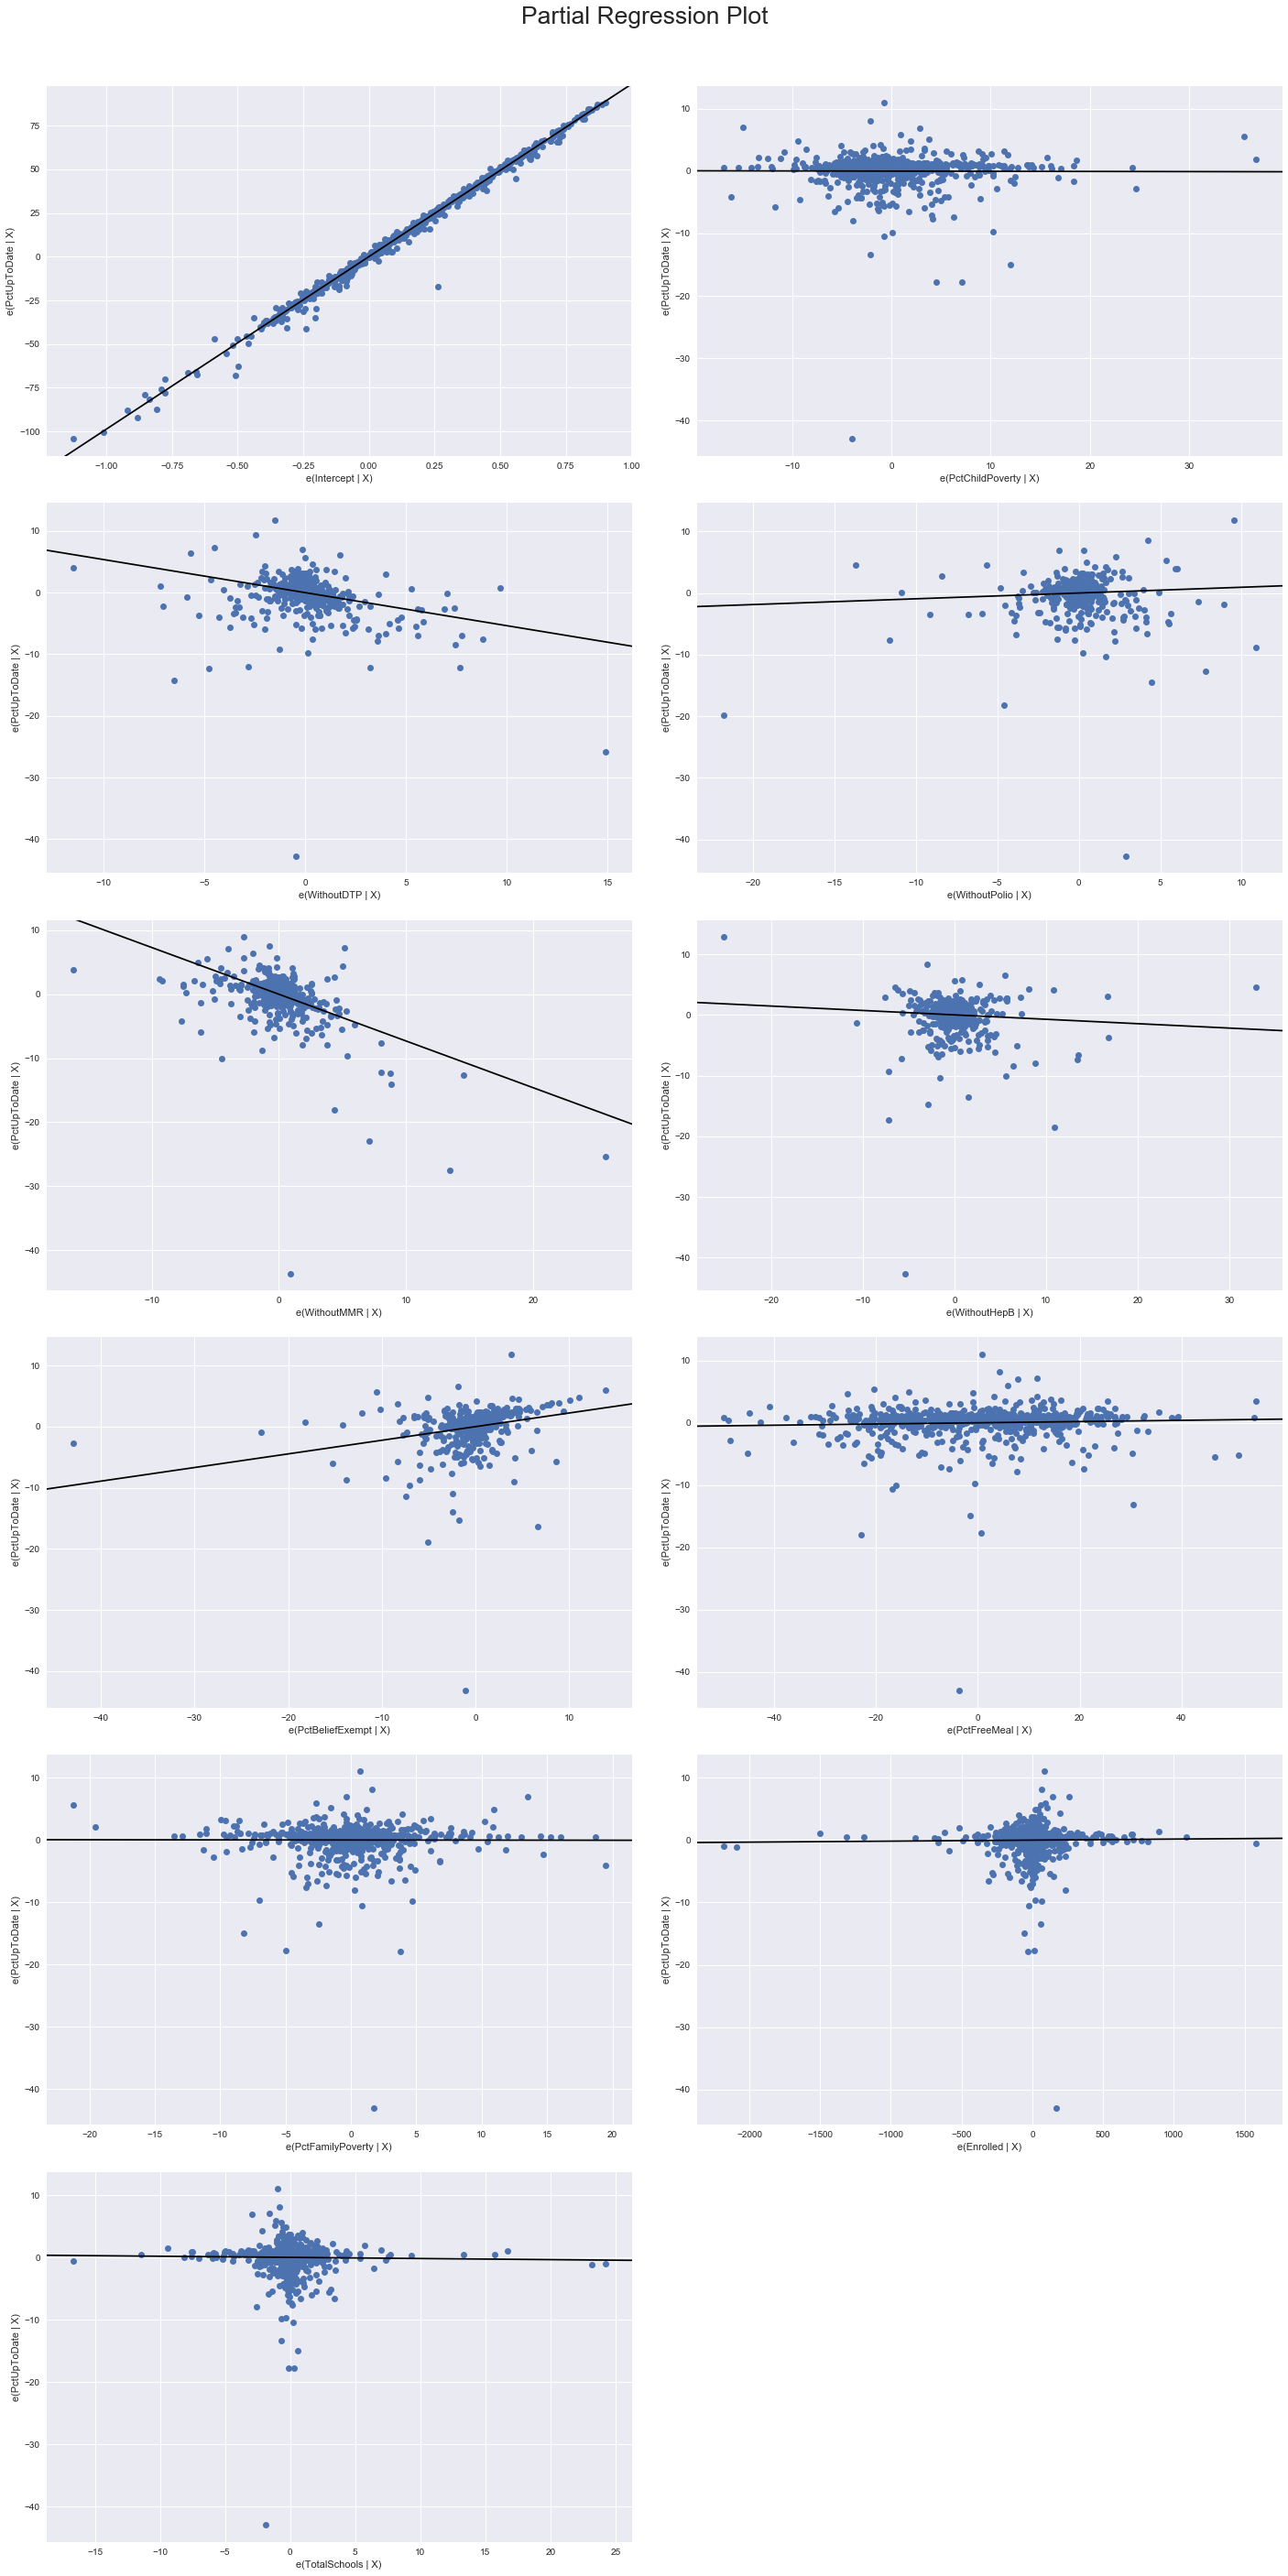

In [68]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20,40))
fig = sm.graphics.plot_partregress_grid(model15, fig=fig)

In [72]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

X = df2['PctChildPoverty']
y = df2['PctUpToDate']
model2.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[55 39 41 20 12 48 17 17 23 24  9 20 28 27 27 31 31 25 36 23 14 14 28 14
 19 28 20 45  5 21 30 34 41 12  7 35 31 37 12 36 33 20 16 19 13 34 14 14
 13 27 34 23  9 12 61 21 24 39 48 31 36 29 17 26 13 35 27 31 10 45 14 16
 21 44 29 13 23 22 33 21 31 24 27 26 36 17 18 13 27 20  5  7  8 13 12 16
 23 20 14 33 57  9 11 13 24 12 13 26 10  9 28  8 27 23  6 21 44 15 10 35
 30 33 31 17  9 29 19 36 11  8 14 17 15 26  9 11 13 15 43 30 15 11 46 22
 16 18 19 26 14 33 37 21 14 25 19 19 14 34 12 16 41 16 10 15 10 16 18 21
 34  9 33  8 15 11 19 17 23  5 15 24 27 11  9 11  6 30 43 31 25 42 48  7
 44 30 21 13 21  6 49 16 39 18 72 16 15 26 26 30 35 27 22  6 22 21 37 25
 27 14 15 10 27  7 12 20 32 15 25 16 21 23 43 15 27 29 11  9 38 20 21 47
 18 19 23 25 20 40 34 34 13 16 10  8 11 27 55 14 11 28  5 18 23 37 36 36
 28 24 18 36 23 30 39  8 36 11 25 31 14 25 14 27  6 28 26  4 29 27  4  8
 25 19 27  8 18  9 29 12 31 19 18 23 22 21 15 13 27 29  5  8 27 36 44 30
 23 41 51 17 31 27 13 19 37  6 23 19  3  9 14  2 26 20 21 25 23 41 50  5
  3  8 26 27 11 22 32 28 23 41 47 11 18 23 53 17 22 28 20 14  6 24 21  9
  7  4  4 34  7 42 22 13 24 32 29 24 12  5 16 28 34 15 18 27 10 30 16 17
 14 23 39 20 16 39 14 57  4 37 15 21 27  5  9 14 11 23 39 28 47 55 18 51
 32 30 12 19  4 11 28 13 27 11 30 41 37 11 45 20 12 30 12 13 32 33 13 15
 18 16 26 16 17 16 24 19  9 16 25 15 14  8 35 27 12 15 21 10 31 51 15 10
  9  4 23 28 26 18 18 10  8 41  7 24 31 33 30  4 26 47  6 22 24 23 45 18
 23 57  9  3 20  9 23 27 46 12  7 24 38 21 11 12 10 13 19 16 23 29 37 46
  6 23  7 14 48  8 19 22 42 23 17  8 18 13 33 39  5 28 22 56  7 18 10 27
 25 20 13 18 29 33 22 35 50 10 24  9 20 33 12  8  8 12 59 24  9 10 19 33
 20 21 10  4 24 17 23 28 14 16 18 15  8 10 28  4 36 29 29  9 11 30 13 11
  5 35 20 13 26  5 13 22 40 31 20 19 11 34 22 15 23 35 16  7 29 31 14 22
 10 13 30 41  9 10 27 33 12 19 26 36 27 36 47 17 15  9 34 54 11  6 28 24
 22 23 33 21 18 10 59 45 17 27 10 14 51 10 19 25 34 27 24 13 11 10 37 12
  6 12 18 14 26 26 31 21 13 25 15 35 49 31 22  6 14 37 44  7 22  6 43 52
 18 17 52 11 13 25 32 43 12 26 31 10 16 30 26 13 37  9 39 14 36 11 17  5
 63 37 23 17].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [78]:
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt


def func(x, params):
    """ A function that describes the underlying model.
        NOTE: MODIFY THIS FUNCTION ACCORDING TO YOUR MODEL
        Gets the evaluation of the function at the given point with given parameters. """

    a, b, c, d, e = params

    return a*np.sin(b*x) + c*x**2 + d*x + e
        # Model parameters
    self.n_params = n_params

        self.func = func
        self.x = x
        self.y = y
        self.stddev_guess = stddev_guess
        self.sigma_error_estimate = sigma_error_estimate
        self.chi_tolerance = chi_tolerance
        self.max_iter = max_iter


    def fit(self):
        """ Markov Chain Monte Carlo univariate regression.
            This function fits the given model to the given data using the Markov Chain Monte Carlo Method. 
            The guesses are chosen using the Gaussian distribution.
            """

        # Initial guess
        theta1 = np.zeros(self.n_params)

        # Solve for the initial parameters
        y_model = self.func(self.x, theta1)

        # Calculate the sum of squared diffs
        chi1 = np.sum((self.y - y_model)**2)

        x_size = len(self.x)

        # Run for the max. number of iterations
        for n in range(self.max_iter):

            # Do a random walk in the parameter space
            theta2 = theta1 + np.random.normal(0.0, self.stddev_guess, self.n_params)

            # Solve for the given parameters
            y_model = self.func(self.x, theta2)

            # Calculate the sum of squared diffs
            chi2 = np.sum((self.y - y_model)**2)

            # Likelihood ratio
            ratio = np.exp((-chi2+chi1)/(2*self.sigma_error_estimate**2))

            # If the new guess has a better likelihood ratio, keep it
            if np.random.uniform(0.0, 1.0) < ratio:
                theta1 = theta2
                chi1 = chi2

                # Break if the desired tolerance is reached
                if chi1/x_size < self.chi_tolerance:
                    break


        print 'Iterations:', "{:,d} out of max. {:,d}".format(n+1, self.max_iter)
        print 'Final mean square residuals: ', chi1/x_size

        return theta1

IndentationError: unexpected indent (<ipython-input-78-f5662ea2d3e5>, line 17)